<html>
<pre style="line-height : 11px;">
    
                            ███████╗███████╗ █████╗ ██████╗  ██████╗██╗  ██╗
                            ██╔════╝██╔════╝██╔══██╗██╔══██╗██╔════╝██║  ██║
                            ███████╗█████╗  ███████║██████╔╝██║     ███████║
                            ╚════██║██╔══╝  ██╔══██║██╔══██╗██║     ██╔══██║
                            ███████║███████╗██║  ██║██║  ██║╚██████╗██║  ██║
                            ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝ ╚═════╝╚═╝  ╚═╝
                                                ███╗   ██╗
                                                ████╗  ██║
                                                ██╔██╗ ██║
                                                ██║╚██╗██║
                                                ██║ ╚████║
                                                ╚═╝  ╚═══╝
                        ██╗██████╗ ███████╗███╗   ██╗████████╗██╗███████╗██╗   ██╗
                        ██║██╔══██╗██╔════╝████╗  ██║╚══██╔══╝██║██╔════╝╚██╗ ██╔╝
                        ██║██║  ██║█████╗  ██╔██╗ ██║   ██║   ██║█████╗   ╚████╔╝ 
                        ██║██║  ██║██╔══╝  ██║╚██╗██║   ██║   ██║██╔══╝    ╚██╔╝  
                        ██║██████╔╝███████╗██║ ╚████║   ██║   ██║██║        ██║   
                        ╚═╝╚═════╝ ╚══════╝╚═╝  ╚═══╝   ╚═╝   ╚═╝╚═╝        ╚═╝   
                                                          

                                                                    
</pre>
<hr>


<h5 style="text-align: center;">2019 Communications Security Establishment<br>Built by Waun Broderick && the Data Science Team</h5>



<p style="text-align: center;"><i>
A pipeline that attempts to find the presence of flags within a series of imagesthen identifies them for their nation of origin
    </i></p>


<p style="text-align: center; color: red;">
 UNTIL I HAVE COMPLETED THE SERIES-A OF TESTING THE DOCUMENTATION AND PATHS WILL NOT BE THE MOST ORGANIZED OR BUILT TO RUN ON ALL TERMINALS, AS WELL MANY FILES HAVE BEEN .GITIGNORED DUE TO SIZECONSTRAINTS. WITH TIME THESE WILL BE FIXED.
</p>                                                                                                                            

## TABLE OF CONTENTS:
<ul>
    <li><a href="#dataEngineering">Pre-Build Data Engineering</a></li>
    <ul>
        <li >1. <a href="#dataGathering">Data Gathering</a></li>
        <ul>
            <li>1.1 <a href="#microsoftAPI">Microsoft Cognitive Services API</a></li>
        </ul>
        <li>2. <a href="#dataAugmentation">Data Augmentation</a></li>
        <ul>
            <li>2.1 <a href="#imageReplication">Image Replication</a></li>
        </ul>
    </ul>
    <li><a href="#modelBuilding">Model Building</a></li>
    <ul>
    <li>3. <a href="#flagRecognition">Training The Flag Recognition Model</a></li>
    <li>4. <a href="#flagIdentification">Training The Flag Identification Model</a></li>
        <ul>
            <li>4.1 <a href="#cnnParams">Selecting Parameters for CNN</a></li>
            <li>4.2 <a href="#dataPipeline">Structure Data Pipeline</a></li>
            <li>4.3 <a href="#buildCNN">Build CNN</a></li>
            <li>4.4 <a href="#trainModel">Train Model</a></li>
        </ul>
        <li>5. <a href="#batchProcess">Model Batch Execution Process</a></li>
        <ul>
            <li>5.1 <a href="#flagFind">Batch Process Flag Finder</a></li>
            <li>5.2 <a href="#flagId">Batch Process Flag Identifier</a></li>
        </ul>
        <li>6. <a href="#programExecute">Program Execution</a></li>
    </ul>
    <li><a href="#reference">Reference</a></li>
</ul>
    

    
    
</html>

<hr>
<h1 style="text-align: center;">Importing Dependencies</h1>
<p>Some dependencies may require extra work to install on your local system though details will be listed on the project wiki and in the eventual requirements.txt</p>

In [3]:
from shutil import copyfile
import cv2
import keras
import tensorflow as tf
import os
import io
import numpy as np



from keras import optimizers
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Dropout, Flatten,Input, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from matplotlib import image, patches, pyplot as plt
#requires a PyPi build that will be outlined in the requirements.txt
from darknetpy.detector import Detector

from IPython.display import display

Using TensorFlow backend.


<a name="dataEngineering"></a>
<hr>
<h1 style="text-align: center;">Pre-Build Data Engineering</h1>
<hr>

<p>The following is more of a logical breakdown of the steps that were conducted to prepare the data and get to the build and execution of the program. However much of this is more for reference and observation, as this will all be done initally and not required to be done again after its inital run through.
</p>

<a name="dataGathering"></a>
<h1>1 Data Gathering</h1>

<a name="microsoftAPI"></a>
<h3>1.1 Microsoft Cognitive Services API</h3>
<p>The code that follows below is a replica of the program used that utilizes the Microsoft Cognitive service library and the Bing Search V4 API to scrape a large series of pictures. This was the method used to gather image data for each of the countries flags that were being observed.</p>

<html>
    <div style="margin:0 auto;height:300px;width:90%;overflow:auto;background-color:gray;color:white;scrollbar-base-color:gold;font-family:sans-serif;padding:10px;">
        <code style="background-color:gray;color:white;">
            #import the necessary packages
            from requests import exceptions
            import argparse
            import requests
            import cv2
            import os
            <br>
            #construct the argument parser and parse the arguments
            ap = argparse.ArgumentParser()
            ap.add_argument("-q", "--query", required=True,
                help="search query to search Bing Image API for")
            ap.add_argument("-o", "--output", required=True,
                help="path to output directory of images")
            args = vars(ap.parse_args())
            <br>
            # set your Microsoft Cognitive Services API key along with (1) the
            # maximum number of results for a given search and (2) the group size
            # for results (maximum of 50 per request)
            API_KEY = "[REDACTED - INSERT OWN API]"
            MAX_RESULTS = 250
            GROUP_SIZE = 50
            <br>
            # set the endpoint API URL
            URL = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
            <br>
            # when attemping to download images from the web both the Python
            # programming language and the requests library have a number of
            # exceptions that can be thrown so let's build a list of them now
            # so we can filter on them
            EXCEPTIONS = set([IOError, FileNotFoundError,
            	exceptions.RequestException, exceptions.HTTPError,
                exceptions.ConnectionError, exceptions.Timeout])
            <br>
            # store the search term in a convenience variable then set the
            # headers and search parameters
            term = args["query"]
            headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
            params = {"q": term, "offset": 0, "count": GROUP_SIZE}
            <br>
            # make the search
            print("[INFO] searching Bing API for '{}'".format(term))
            search = requests.get(URL, headers=headers, params=params)
            search.raise_for_status()
            <br>
            # grab the results from the search, including the total number of
            # estimated results returned by the Bing API
            results = search.json()
            estNumResults = min(results["totalEstimatedMatches"], MAX_RESULTS)
            print("[INFO] {} total results for '{}'".format(estNumResults,
                term))
             <br>
            # initialize the total number of images downloaded thus far
            total = 0
            <br>
            # loop over the estimated number of results in `GROUP_SIZE` groups
            for offset in range(0, estNumResults, GROUP_SIZE):
                # update the search parameters using the current offset, then
                # make the request to fetch the results
                print("[INFO] making request for group {}-{} of {}...".format(
                    offset, offset + GROUP_SIZE, estNumResults))
                params["offset"] = offset
                search = requests.get(URL, headers=headers, params=params)
                search.raise_for_status()
                results = search.json()
                print("[INFO] saving images for group {}-{} of {}...".format(
                    offset, offset + GROUP_SIZE, estNumResults))
                <br>
                # loop over the results
                for v in results["value"]:
                    # try to download the image
                    try:
                        # make a request to download the image
                        print("[INFO] fetching: {}".format(v["contentUrl"]))
                        r = requests.get(v["contentUrl"], timeout=30)
                        <br>
                        # build the path to the output image
                        ext = v["contentUrl"][v["contentUrl"].rfind("."):]
                        p = os.path.sep.join([args["output"], "{}{}".format(
                            str(total).zfill(8), ext)])
                        <br>
                        # write the image to disk
                        f = open(p, "wb")
                        f.write(r.content)
                        f.close()
                     <br>
                    # catch any errors that would not unable us to download the
                    # image
                    except Exception as e:
                        # check to see if our exception is in our list of
                        # exceptions to check for
                        if type(e) in EXCEPTIONS:
                            print("[INFO] skipping: {}".format(v["contentUrl"]))
                            continue
                    <br>
                    # try to load the image from disk
                    image = cv2.imread(p)
                    <br>
                    # if the image is `None` then we could not properly load the
                    # image from disk (so it should be ignored)
                    if image is None:
                        print("[INFO] deleting: {}".format(p))
                        os.remove(p)
                        continue
                    <br>
                    # update the counter
                    total += 1
              <br>
        </code>
    </div>
</html>

<a name="dataAugmentation"></a>
<h1> 2 Data Agumentation </h1>
<a name="imageReplication"></a>
<h3>2.1 Image Replication</h3>

In [ ]:
#A sereis of operations that were selected to apply to images to create a greater amount of image variation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#root directory for data augmentation
rootdir = '/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/'

#testing purposes
count = 0

#Move through the designated root directory and traverse through the individual files inside
for subdir, dirs, files in os.walk(rootdir):
    print("working in " +subdir)
    for file in files:
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            count += 1
            #Loading the image
            img = load_img(subdir + "/" + file)
            #The Numpy array responsible for shape adhearance
            x = img_to_array(img) 
            x = x.reshape((1,) + x.shape)

            # the .flow() command below generates batches of randomly transformed images
            # and saves the results to the `preview/` directory
            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir= subdir + "/", save_prefix='DA', save_format='jpg'):
                i += 1
                #Set to desired iterations
                if i > 3:
                    #Setting bound to break loop so to avoid indefinite run
                    break  
    print(count)
    count=0

working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/
0
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Mexico
246
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Pakistan
245
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/China
243
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Iran
247
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/India
245
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Canada


/home/csec/anaconda3/envs/darknet/lib/python3.7/site-packages/PIL/Image.py:965: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


212
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Argentina
243
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Portugal
241
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/USA
245
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Belgium
245
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/England
234
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Brazil
244
working in /home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/data/Denmark


<a name="modelBuilding"></a>
<hr>
<h1 style="text-align: center;">Model Building</h1>
<hr>

<a name="flagRecognition"></a>
<h1>3 Training the Flag Recognition Model</h1>
<p>Currently working on finding the best way to detail this process, though will probably be after testing is complete! It will include;</p>
<ul>
    <li>Google Open Images Dataset v4</li>
    <li>OID Toolkit</li>
    <li>YOLOv3 Architecture</li>
    <li>GPU acceleration with CUDA</li>
    <li>Model weight selection</li>
</ul>

<a name="flagIdentification"></a>
<h1>4 Training The Flag Identification Model</h1>
<p>Building a CNNet to parse through the found flags and try to determine their nation of origin</p>

<a name="cnnParams"></a>
<h3>4.1 Selecting Parameters for CNN</h3>
<p>below parameters such as the number of epochs and input dimensions can be set. However for things like the directory structure that feeds into class breakdown that is hardcoded in logic and is currently not built to take operatre under a lot of change from its current state.</p>

In [2]:
#Defining the number of EPOCHs desired for training
epochs = 100

# input image dimensions
img_rows, img_cols = 64, 64
dataDir= '/home/csec/Documents/Python/Notebooks/flagObjectFinder/data/' 

#The number of class labels == total number of countries which == length of the folders in .dir
datas=load_files(dataDir, load_content= False)
total_countries=len(datas.target_names)

#Testing purposes
#print(total_countries)

<a name="dataPipeline"></a>
<h3>4.2 Structure Data Pipeline</h3>

In [3]:
def build_data(datas):
    X = []
    y = []
    encoder = LabelBinarizer()
    encoded_dict=dict()
    hotcoded_label = encoder.fit_transform(datas.target_names)
    for i in range(len(datas.target_names)):
        encoded_dict[datas.target_names[i]]=hotcoded_label[i]
        #For testing and identification purposes
        #print("The country ", datas.target_names[i] , "is associated with code: ", encoded_dict[datas.target_names[i]])
    for country in os.listdir(dataDir):
        label=encoded_dict[country]
        for each_flag in os.listdir(dataDir+'/'+country): 
            actual_path = os.path.join(dataDir,country,each_flag)
            img_data = cv2.imread(actual_path)
            img_data = cv2.resize(img_data, (img_rows, img_cols))
            X.append(np.array(img_data))
            y.append(label)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    return [X_train, X_test, y_train, y_test]

<a name="buildCNN"></a>
<h3>4.3 Build CNN</h3>

In [28]:
def create_model(input_shape,classes):
    #Takes the specifications of the image inputted
    img_input = Input(shape=input_shape)
    #The following is an architecture to facilitate the processes of 'disecting' the photo
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', name='fc2')(x)
    x = Dropout(0.2)(x)
    x = Dense(classes, activation='softmax', name='final_output')(x)

    model = Model(img_input, x, name='flag')
    return model

<a name="trainModel"></a>
<h3>4.4 Train Model</h3>

In [23]:
def train_model(x_train, x_test, y_train, y_test):
    input_shape=(img_rows,img_cols,3)
    model=create_model(input_shape,total_countries)
    adams=optimizers.Adam(lr=1e-4)
    model.compile(loss='categorical_crossentropy',
                optimizer= adams,
                metrics=['accuracy'])
    model.fit(x = x_train, y = y_train, epochs=epochs)
    score = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    model.save('flagFinder.model')   
    return model

<a name="batchProcess"></a>
<h1>5 Model Batch Execution Process</h1>
<p>The functions responsible for properly executing the trained models on a sereis of data in a batch process.</p>

<a name="flagFind"></a>
<h3>5.1 Batch Process Flag Finder</h3>

In [34]:
def flag_search(directory, cutOff):
    #the detector follows the following schemea: 
    # detector = Detector(
    #          '<Trained on .data file>',
    #          '<Trained on .cfg file>',
    #          '<Trained model weights file>'
    #)

    detector = Detector(
        '/home/csec/Desktop/darknet-master/cfg/flag.data',
        '/home/csec/Desktop/darknet-master/cfg/flag.cfg',
        '/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/weights/flag_800.weights'
    )

    
    #Creation of a directory to place positive hits on found flags with determined threshold pass
    if not os.path.exists(directory + "/positive"):
        os.makedirs(directory + "/positive")

    #Setting a variable to the positive output directory for eaiser utilization
    positiveDir = (directory + 'positive/')
    
    #Traverses through the given directory containing test images
    for filename in os.listdir(directory):
                #Accpets various photo formats that were processed previous
                if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
                    #Object detector function
                    boxes = detector.detect(directory + filename)
                    #Iterate through the amount of objects found within each image
                    for i in range(len(boxes)):
                        #Counter and used for segmentation image naming variation
                        i += 1
                        dictBox = dict(boxes[i-1])
                        #probablity check for the cutoff threshold passed to the method
                        if dictBox['class'] == 'flag' and dictBox['prob'] > cutOff:
                            #BELOW: testing purposes
                            #print(boxes)
                            #print(filename)
                            #print(i)
                            for i, box in enumerate(boxes):
                                #Series of variables for the extraction of detected objects
                                l = int(box['left'])
                                t = int(box['top'])
                                b = int(box['bottom'])
                                r = int(box['right'])
                                c = box['class']
                                h = b - t
                                w = r - l
                                a = l * w
                                img = cv2.imread(directory + filename)

                                #Cropping the object to specifications derived from detector identification
                                crop_img = img[t: t+ h, l: l+ w]

                                #Writing the cropped object to the new positive directory
                                cv2.imwrite(positiveDir + filename ,crop_img)
    flag_identify(positiveDir)

<a name="flagId"></a>
<h3>5.2 Batch Process Flag Identifier</h3>

In [18]:
def flag_identify(positiveDir):

    #An array to keep the list of countries built from the data ingestion step
    countries = []

    #iterate through the ingestion stage names and append them to a list for ease of labeling
    for i in range(len(datas.target_names)):
        i += 1
        countries.append(datas.target_names[i-1])

    #Another data preperation step for image ingestion for prediction identification
    def prepare(filepath):
        IMG_SIZE = 64
        img_array = cv2.imread(filepath)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

    #Load in the previously built model
    model = tf.keras.models.load_model("flagFinder.model")

    #Traverses through the given directory containing test images
    for filename in os.listdir(positiveDir):
        #Accpets various photo formats that were processed previous
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            prediction = model.predict([prepare(positiveDir + filename)])
            topCountry = int(np.argmax(prediction, axis=1))
            secondCountry = int(np.argmax(prediction, axis=1)-1)
            #Writes predictions to a set directory for ease of view
            with open("/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/flags.txt", "a") as myfile:
                #Generic sentence for output both the filename and the TOP PREDICTION (can be adjusted for other predictions)
                myfile.write("A flag was found in photo: " + filename + ", It is most likely to from the Nation: " + countries[topCountry] +", or ," + countries[secondCountry] +"\n" )

<a name="programExecute"></a>
<h1>6 Program Execution</h1>

In [29]:
def build_flag_identifier():
    x_train, x_test, y_train, y_test = build_data(datas)
    train_model(x_train, x_test, y_train, y_test)
    
def run_flag_finder(directory, cutOff):
    #Weights were trained outside of this program and has reference in the project wiki
    flag_search(directory, cutOff)

    
    
def main():
    build_flag_identifier()
    #run_flag_finder('/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/tests/', 0.1)
    
if __name__ == "__main__":
    main()

Epoch 1/100
3716/3716 [==============================] - 48s 13ms/step - loss: 3.2541 - acc: 0.2890
Epoch 2/100
3716/3716 [==============================] - 46s 12ms/step - loss: 1.2446 - acc: 0.6327
Epoch 3/100
3716/3716 [==============================] - 61s 16ms/step - loss: 0.8520 - acc: 0.7578
Epoch 4/100
3716/3716 [==============================] - 50s 13ms/step - loss: 0.6512 - acc: 0.8060
Epoch 5/100
3716/3716 [==============================] - 41s 11ms/step - loss: 0.5180 - acc: 0.8517
Epoch 6/100
3716/3716 [==============================] - 54s 15ms/step - loss: 0.4383 - acc: 0.8738
Epoch 7/100
3716/3716 [==============================] - 55s 15ms/step - loss: 0.3641 - acc: 0.8932
Epoch 8/100
3716/3716 [==============================] - 43s 12ms/step - loss: 0.3197 - acc: 0.9064
Epoch 9/100
3716/3716 [==============================] - 50s 13ms/step - loss: 0.2629 - acc: 0.9252
Epoch 10/100
3716/3716 [==============================] - 43s 12ms/step - loss: 0.2331 - acc: 0.9335

3716/3716 [==============================] - 43s 12ms/step - loss: 0.0029 - acc: 0.9992
Epoch 83/100
3716/3716 [==============================] - 49s 13ms/step - loss: 0.0177 - acc: 0.9943
Epoch 84/100
3716/3716 [==============================] - 45s 12ms/step - loss: 0.0310 - acc: 0.9898
Epoch 85/100
3716/3716 [==============================] - 43s 12ms/step - loss: 0.0431 - acc: 0.9890
Epoch 86/100
3716/3716 [==============================] - 42s 11ms/step - loss: 0.0196 - acc: 0.9938
Epoch 87/100
3716/3716 [==============================] - 47s 13ms/step - loss: 0.0138 - acc: 0.9952
Epoch 88/100
3716/3716 [==============================] - 44s 12ms/step - loss: 0.0080 - acc: 0.9976
Epoch 89/100
3716/3716 [==============================] - 47s 13ms/step - loss: 0.0061 - acc: 0.9978
Epoch 90/100
3716/3716 [==============================] - 49s 13ms/step - loss: 0.0049 - acc: 0.9989
Epoch 91/100
3716/3716 [==============================] - 46s 12ms/step - loss: 0.0035 - acc: 0.9989
Epo

In [30]:
f = open('/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/flags.txt', 'r')
file_contents = f.read()
print(file_contents)

A flag was found in photo: Positive-Russia.jpg, It is most likely to from the Nation: Russia
A flag was found in photo: Positive-USA.jpg, It is most likely to from the Nation:USA
A flag was found in photo: Positive-China.jpeg, It is most likely to from the Nation: China
A flag was found in photo: Positive-Meixco.jpg, It is most likely to from the Nation: Mexico



<a name="reference"></a>
<hr>
<h1 style="text-align: center;">REFERENCE BELOW</h1>
<hr>

<h1>Recognition Visualization</h1>
<p>Not needed for the overall process but just to show a visual representation of the object detection process</p>

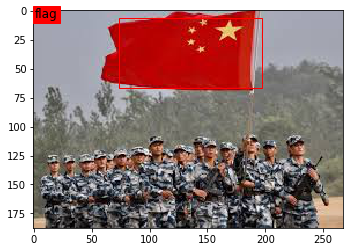

In [4]:
detector = Detector(
    '/home/csec/Desktop/darknet-master/cfg/flag.data',
    '/home/csec/Desktop/darknet-master/cfg/flag.cfg',
    '/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/weights/flag_800.weights'
)

boxes = detector.detect('/home/csec/Documents/Python/Notebooks/flagObjectFinder/tests/flag3.jpeg')

fig, ax = plt.subplots(1)
ax.imshow(image.imread('/home/csec/Documents/Python/Notebooks/flagObjectFinder/tests/flag3.jpeg'))

colors = ['r', 'b', 'y']

for i, box in enumerate(boxes):
    l = box['left']
    t = box['top']
    b = box['bottom']
    r = box['right']
    c = box['class']
    color = colors[i % len(colors)]
    
    rect = patches.Rectangle(
        (l, t),
        r - l,
        b - t,
        linewidth = 1,
        edgecolor = color,
        facecolor = 'none' 
    )
    
    ax.text(1, t, c, fontsize = 12, bbox = {'facecolor': color, 'pad': 2, 'ec': color })
    ax.add_patch(rect)
    
plt.show()

<h1>Data Augmentation Example</h1>

In [6]:
#A last minute addition just to show the transitions
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
import PIL
from glob import glob
from PIL import Image

#Never do this, but for sake of this example
Image.Image.tostring = Image.Image.tobytes

#Load sample image
images = [ PIL.Image.open(f) for f in glob('/home/csec/Documents/Python/Notebooks/Operation_Search_and_Identify/notebookAssets/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tostring(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

np_images = [ img2array(im) for im in images ]

/home/csec/anaconda3/envs/darknet/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


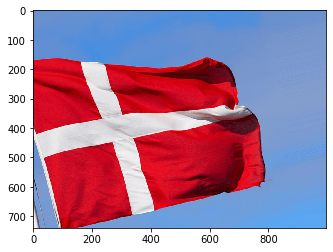

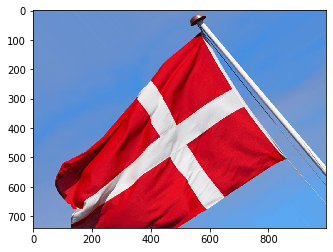

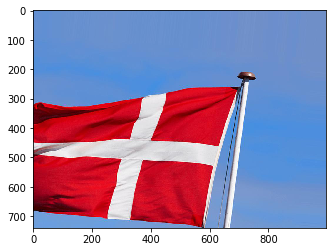

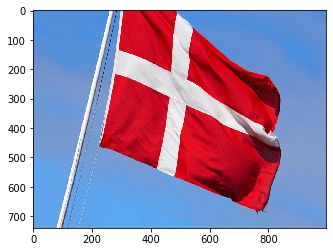

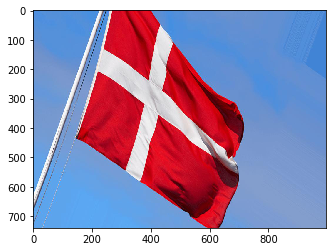

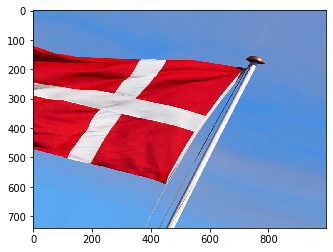

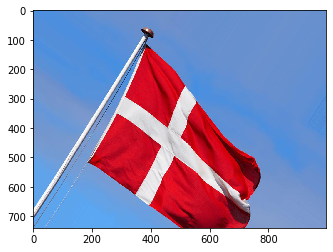

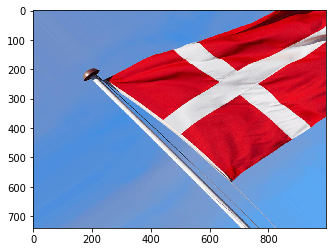

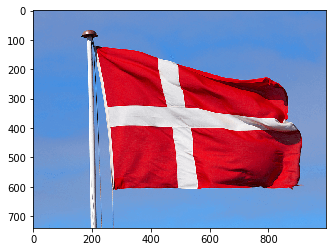

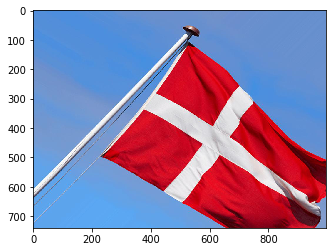

In [7]:
for img in np_images:
    plt.figure()
    plt.imshow(img)